In [7]:
import tclab
import numpy
import pandas

import tbcontrol
from tbcontrol import blocksim

import matplotlib.pyplot as plt
from latex_figure import plotfigure

import datetime

In [8]:
run_length = 2000

In [9]:
Names = ['CC P', 'CC PI', 'CC PID', 'IAE Setpoint PI', 'IAE Setpoint PID', 'IAE Distrurbance P', 'IAE Distrurbance PI', 'IAE Distrurbance PID']

In [20]:
data_frame = pandas.read_csv("Controller Testing.csv", usecols = ['Time', 'T1', 'Q1'], index_col=['Time']).drop_duplicates()
data_frame

,T1,Q1
Time,,
0.0,48.95,51.30
1.0,48.95,65.12
3.0,48.62,65.12
6.0,48.62,69.87
7.0,48.30,69.87
...,...,...
15997.0,60.23,52.71
15998.0,59.90,77.40
15998.0,60.23,77.40


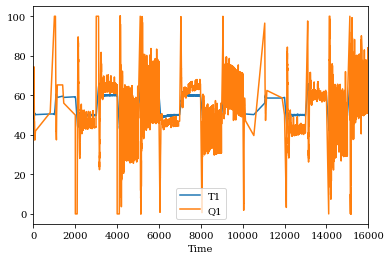

In [63]:
data_frame.plot()

CC P 1
Length 83
CC PI 2
Length 1637
CC PID 3
Length 1854
IAE Setpoint PI 4
Length 1064
IAE Setpoint PID 5
Length 1537
IAE Distrurbance P 6
Length 68
IAE Distrurbance PI 7
Length 912
IAE Distrurbance PID 8
Length 1334


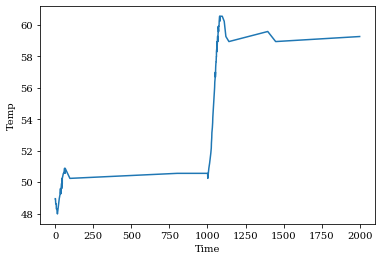

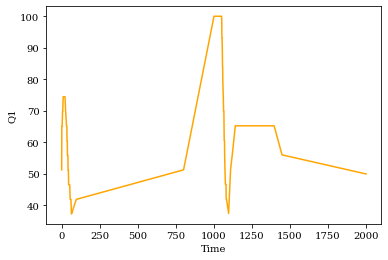

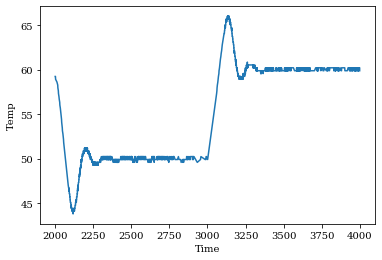

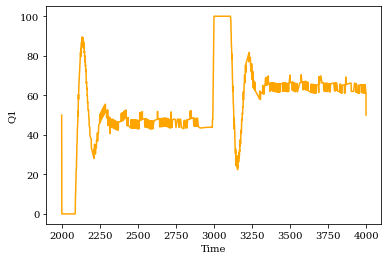

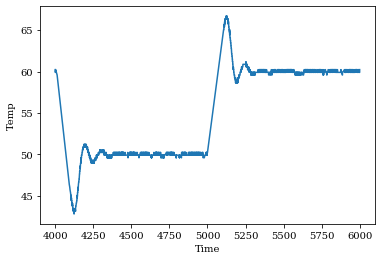

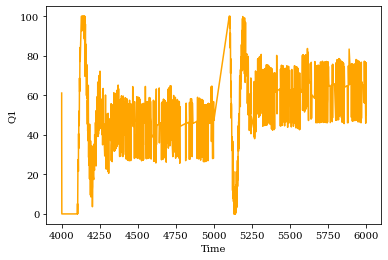

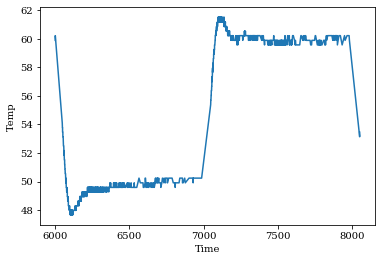

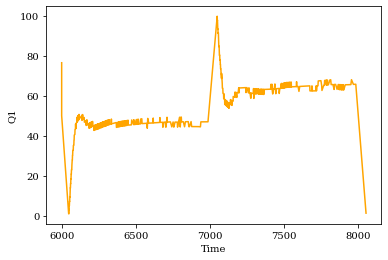

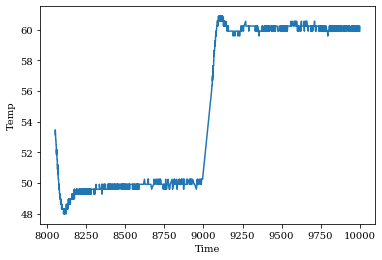

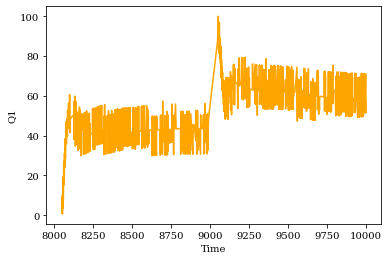

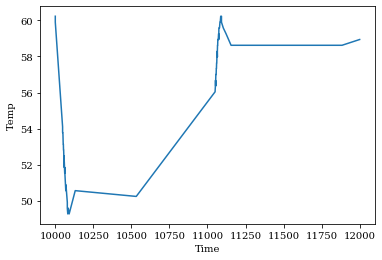

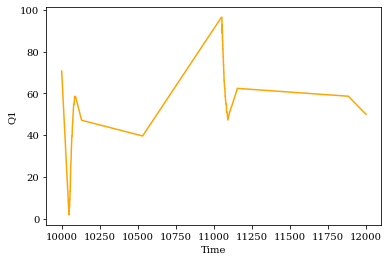

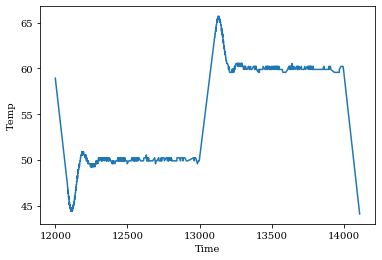

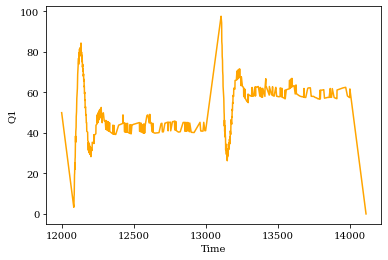

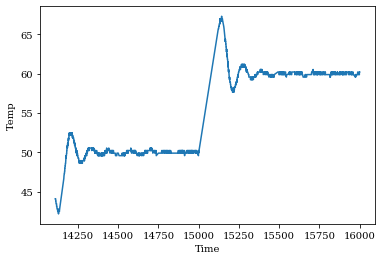

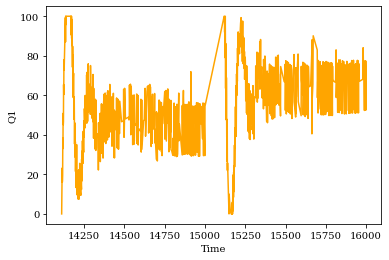

In [61]:
checker = 1
lower = 0
for index, row in data_frame.iterrows():
#     print (index/2000, checker)
    if index/2000 >= checker:
        upper = index
        print (Names[checker-1], checker)
        checker+=1
        
        
        plt.figure()        
        plt.plot(data_frame[lower:upper]['T1'])
        plt.xlabel('Time')
        plt.ylabel('Temp')
        plt.figure()   
        plt.plot(data_frame[lower:upper]['Q1'], 'orange')
        plt.xlabel('Time')
        plt.ylabel('Q1')
        print ('Length',len(data_frame[lower:upper]['T1']))
        lower = index